<a href="https://colab.research.google.com/github/serenazly/ECON441B/blob/main/HW9_IN_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 5, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

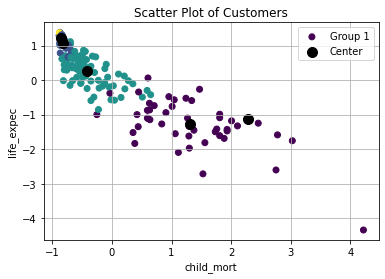

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 6


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

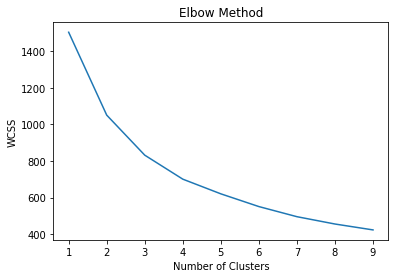

In [12]:

wcss = [] 

for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


The elbow seems to be at 2 or 3.

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

The number of clusters at the elbow point is often a good choice for k. And by inspecting the plot of the Within-Cluster-Sum-of-Squares (WCSS) values against the number of clusters, the elbow point is at roughly 2 or 3. So we can choose k to be either 2 or 3.

In [13]:
kmeans = KMeans(n_clusters=3, n_init=30, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=30, random_state=42)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [14]:
cluster_labels = kmeans.predict(X_scaled)
df_clusters = pd.DataFrame({'country': names['country'], 'cluster': cluster_labels})

# Group the countries by cluster label
countries_by_cluster = {}
for i in range(kmeans.n_clusters):
    countries_by_cluster[i] = list(df_clusters[df_clusters['cluster'] == i]['country'])

for i in range(kmeans.n_clusters):
    print(f'Cluster {i}: {countries_by_cluster[i]}')


Cluster 0: ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 1: ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'To

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [15]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

cluster_stats = pd.concat([pd.Series(range(kmeans.n_clusters), name='cluster'),
                           centers], axis=1)

print(cluster_stats)


   cluster  child_mort   exports    health   imports    income  inflation  \
0        0   -0.827449  0.645080  0.727411  0.190639  1.484243  -0.484921   
1        1    1.360218 -0.437533 -0.155984 -0.189204 -0.686894   0.402111   
2        2   -0.406453 -0.031653 -0.224471  0.024162 -0.251770  -0.017167   

   life_expec  total_fer      gdpp  
0    1.079579  -0.791877  1.615995  
1   -1.282180   1.364944 -0.604242  
2    0.254734  -0.424343 -0.354481  


# Q7.) Write an observation about the descriptive statistics.

Cluster 0 has low child mortality, high exports, high health spending, high imports, high income, high life expectancy, low fertility rate, and high GDP per capita. Therefore it likely represents developed countries.